In [16]:
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from subprocess import check_output

from PIL import Image
%matplotlib inline

In [2]:
classes = check_output(["ls", "seedlings_data/train"]).decode("utf8").strip().split("\n")
classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [3]:
dir_list = []
for c in classes:
    files = check_output(["ls", "seedlings_data/train/%s" % c]).decode("utf8").strip().split("\n")
    dir_list.append(files)
    files = check_output(["ls", "-l", "seedlings_data/train/%s" % c]).decode("utf8").strip().split("\n")

In [4]:
df = pd.DataFrame({"n_images": [len(x) for x in dir_list]}, index=classes)

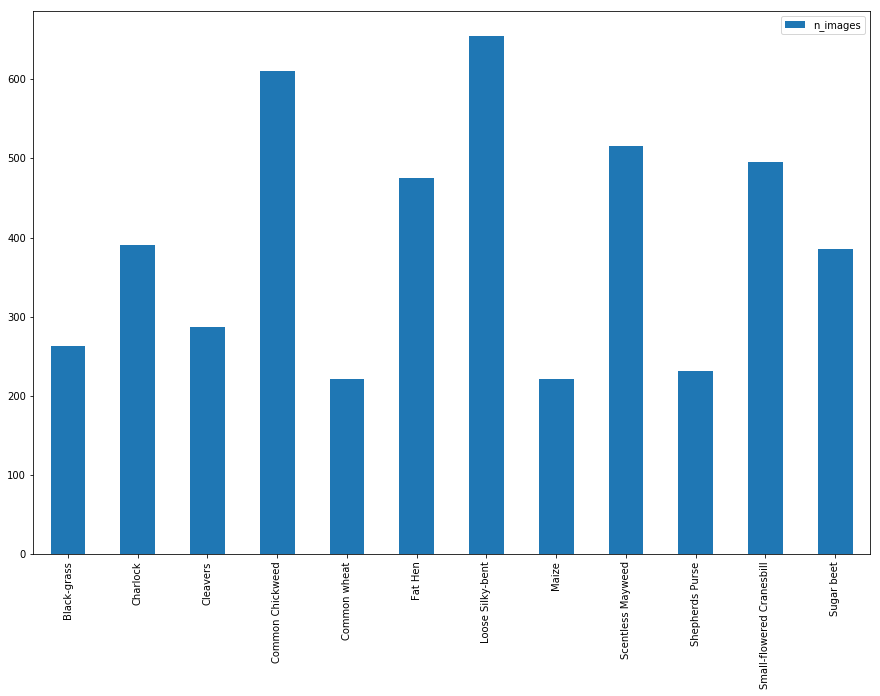

In [5]:
df.plot(kind="bar", figsize=(15, 10))

In [6]:
images = []
pathes = []
im_class = []
im_height = []
im_width = []
for c, files in zip(classes, dir_list):
    for img in files:
        img_path = "seedlings_data/train/%s/%s" % (c, img)
        pathes.append(img_path)
        im = Image.open(img_path)
        images.append(img)
        im_class.append(c)
        im_height.append(im.height)
        im_width.append(im.width)

df_all = pd.DataFrame({"class": im_class, "height": im_height, "width": im_width}, index=images)

df_by_class = pd.DataFrame({"file": images, "class": im_class, "height": im_height, "width": im_width, "path": pathes}, 
                           index=pathes)


In [7]:
df_by_class.head()

,class,file,height,path,width
seedlings_data/train/Black-grass/0050f38b3.png,Black-grass,0050f38b3.png,196,seedlings_data/train/Black-grass/0050f38b3.png,196
seedlings_data/train/Black-grass/0183fdf68.png,Black-grass,0183fdf68.png,388,seedlings_data/train/Black-grass/0183fdf68.png,388
seedlings_data/train/Black-grass/0260cffa8.png,Black-grass,0260cffa8.png,886,seedlings_data/train/Black-grass/0260cffa8.png,886
seedlings_data/train/Black-grass/05eedce4d.png,Black-grass,05eedce4d.png,117,seedlings_data/train/Black-grass/05eedce4d.png,117
seedlings_data/train/Black-grass/075d004bc.png,Black-grass,075d004bc.png,471,seedlings_data/train/Black-grass/075d004bc.png,471


In [20]:
print(df_by_class.shape)
one_hot_by_class = pd.get_dummies(df_by_class['class'])
print(one_hot_by_class.shape)

# (4750,12)
y_loaded = one_hot_by_class.as_matrix()
print('y_loaded shape= ' + str(y_loaded.shape))
print(y_loaded[4000])

images_resized = []

for im_path in one_hot_by_class.index:
    imageCV = cv2.imread(im_path)
    images_resized.append(cv2.resize(imageCV, (300, 300), interpolation=cv2.INTER_AREA))
    
    
# (4750, 300, 300, 3)
images_resized = np.array(images_resized)

# print(one_hot_by_class.index)
# print(one_hot_by_class.loc['seedlings_data/train/Black-grass/0050f38b3.png'])

# one_hot_by_class.head()


(4750, 5)
(4750, 12)
y_loaded shape= (4750, 12)
[0 0 0 0 0 0 0 0 0 0 1 0]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [33]:
print('Resized images shape: ' + str(images_resized.shape))
print('One hot for training set: ' + str(y_loaded.shape))
imshow(images_resized[5])

Resized images shape: (4750, 300, 300, 3)
One hot for training set: (4750, 12)


In [36]:

# save nd arrays to files
np.save('seedlings_data/numpy_imgs_resized_train', images_resized)
np.save('seedlings_data/numpy_imgs_train_onehot', y_loaded)

In [45]:
y_loaded = np.load('seedlings_data/numpy_imgs_train_onehot.npy')
images_resized = np.load('seedlings_data/numpy_imgs_resized_train.npy')
print(y_loaded.shape)
print(images_resized.shape)
imshow(images_resized[639])

(4750, 12)
(4750, 300, 300, 3)


In [10]:
a_ratio = df_all.height.astype("float") / df_all.width.astype("float")
print(a_ratio.mean(), a_ratio.std())

0.999711367223 0.00808035953227


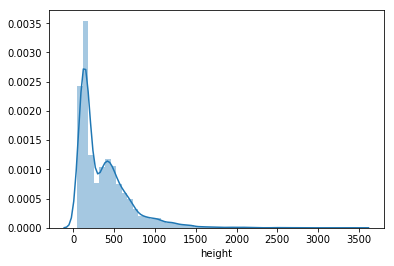

In [11]:
df_all["a_ratio"] = a_ratio

sns.distplot(df_all.height)



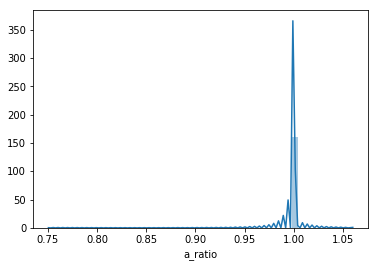

In [12]:
sns.distplot(df_all.a_ratio)